<a href="https://colab.research.google.com/github/Ashishkumarpanda/Suicide-Avoidiance--model/blob/main/Emotion_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files 
a = files.upload()

Saving test.txt to test.txt
Saving train.txt to train.txt
Saving val.txt to val.txt


In [ ]:
import pandas as pd
from  keras.preprocessing.text import Tokenizer

In [ ]:
df_train = pd.read_csv('train.txt', header =None, sep =';', names = ['Input','Sentiment'], encoding='utf-8')
df_train.head()

,Input,Sentiment
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_test = pd.read_csv('test.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df_val = pd.read_csv('val.txt', header = None, sep =';', names = ['Input','Sentiment'],encoding='utf-8')
df_test.head()

,Input,Sentiment
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [28]:
import numpy as np
np.unique(df_train['Sentiment'])

array([0, 1, 2, 3, 4, 5])

In [29]:
df_train.head(15)

,Input,Sentiment
0,i didnt feel humiliated,3
1,i can go from feeling so hopeless to so damned...,3
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
5,ive been feeling a little burdened lately wasn...,3
6,ive been taking or milligrams or times recomme...,5
7,i feel as confused about life as a teenager or...,4
8,i have been with petronas for years i feel tha...,0
9,i feel romantic too,2


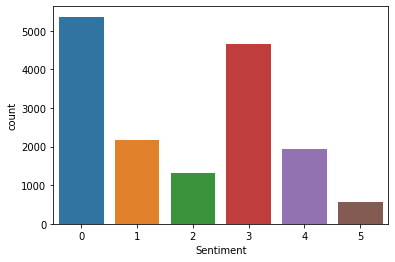

In [30]:
import seaborn as sns
sns.countplot(x="Sentiment",data=df_train)

In [31]:
df_train.isnull().sum()

Input        0
Sentiment    0
dtype: int64

In [32]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Input      16000 non-null  object
 1   Sentiment  16000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 250.1+ KB


In [33]:
x = df_train["Input"]
y = df_train["Sentiment"]

In [34]:
tokenizer=Tokenizer(15212,lower=True,oov_token='UNK')
tokenizer.fit_on_texts(x)

In [35]:
X_train=tokenizer.texts_to_sequences(x)
from keras.preprocessing.sequence import pad_sequences
X_train_pad=pad_sequences(X_train,maxlen=80,padding='post')

In [36]:
df_train["Sentiment"].replace("joy",0,inplace=True)
df_train["Sentiment"].replace("anger",1,inplace=True)
df_train["Sentiment"].replace("love",2,inplace=True)
df_train["Sentiment"].replace("sadness",3,inplace=True)
df_train["Sentiment"].replace("fear",4,inplace=True)
df_train["Sentiment"].replace("surprise",5,inplace=True)

In [38]:
Y_train=df_train['Sentiment'].values

In [39]:
from keras.utils import to_categorical
Y_train_f=to_categorical(Y_train)


In [40]:
Y_train_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

In [41]:
X_val=df_val['Input']
Y_val=df_val.Sentiment.replace({'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5})

In [42]:
X_val_f=tokenizer.texts_to_sequences(X_val)
X_val_pad=pad_sequences(X_val_f,maxlen=80,padding='post')

In [43]:
Y_val_f=to_categorical(Y_val)

In [44]:
Y_val_f[:6]

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]], dtype=float32)

In [48]:
from keras.models import  Sequential
from keras.layers import Embedding,LSTM,Bidirectional,Dense,Dropout
model=Sequential()
model.add(Embedding(15212,64,input_length=80))
model.add(Dropout(0.6))
model.add(Bidirectional(LSTM(80,return_sequences=True)))
model.add(Bidirectional(LSTM(160)))
model.add(Dense(6,activation='softmax'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 80, 64)            973568    
_________________________________________________________________
dropout (Dropout)            (None, 80, 64)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 80, 160)           92800     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 320)               410880    
_________________________________________________________________
dense (Dense)                (None, 6)                 1926      
Total params: 1,479,174
Trainable params: 1,479,174
Non-trainable params: 0
_________________________________________________________________
None


In [49]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [50]:
hist=model.fit(X_train_pad,Y_train_f,epochs=12,validation_data=(X_val_pad,Y_val_f))

Epoch 1/12
500/500 [==============================] - 202s 393ms/step - loss: 1.4869 - accuracy: 0.4048 - val_loss: 0.7579 - val_accuracy: 0.7175
Epoch 2/12
500/500 [==============================] - 193s 387ms/step - loss: 0.6028 - accuracy: 0.7862 - val_loss: 0.2678 - val_accuracy: 0.9060
Epoch 3/12
500/500 [==============================] - 193s 387ms/step - loss: 0.2675 - accuracy: 0.9072 - val_loss: 0.2182 - val_accuracy: 0.9230
Epoch 4/12
500/500 [==============================] - 194s 388ms/step - loss: 0.1860 - accuracy: 0.9325 - val_loss: 0.1693 - val_accuracy: 0.9310
Epoch 5/12
500/500 [==============================] - 194s 387ms/step - loss: 0.1490 - accuracy: 0.9409 - val_loss: 0.1783 - val_accuracy: 0.9265
Epoch 6/12
500/500 [==============================] - 194s 388ms/step - loss: 0.1241 - accuracy: 0.9506 - val_loss: 0.1628 - val_accuracy: 0.9325
Epoch 7/12
500/500 [==============================] - 194s 388ms/step - loss: 0.1023 - accuracy: 0.9607 - val_loss: 0.1579 -

In [52]:
import matplotlib.pyplot as plt

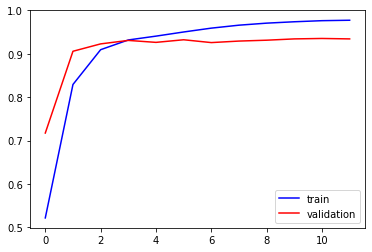

In [53]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.legend(loc='lower right')
plt.show()

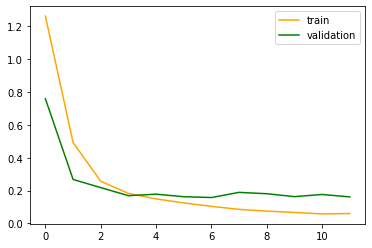

In [54]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.legend(loc='upper right')
plt.show()

In [57]:
def get_key(value):
    dictionary={'joy':0,'anger':1,'love':2,'sadness':3,'fear':4,'surprise':5}
    for key,val in dictionary.items():
          if (val==value):
            return key

In [58]:
def predict(sentence):
  sentence_lst=[]
  sentence_lst.append(sentence)
  sentence_seq=tokenizer.texts_to_sequences(sentence_lst)
  sentence_padded=pad_sequences(sentence_seq,maxlen=80,padding='post')
  ans=get_key(model.predict_classes(sentence_padded))
  print("The emotion predicted is",ans)

In [67]:
predict(str(input('Enter a sentence : ')))

Enter a sentence : i should end this
The emotion predicted is anger


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
